# Mini project: Fitting Data - With Solutions

## Introduction and setup

In this project, you will determine the lifetime of an unstable subatomic particle known as the "muon" using real data. Thanks to QuarkNet organization for the basis of this project.

At the Large Hadron Collider at CERN, protons are accelerated to extremly high energies and made to collide with one an other. The properties (energy, momentum, etc.) of particles produced in these collisions are measured by experiments such as the Compact Muon Solenoid (CMS).

<div align="center">
    <img src="../Images/cms.jpg" style="height:500px"/>
        <figcaption>The CMS detector at the LHC.</figcaption>
</div>

Contrary to expectations, muons (and other particles) don't always have the same mass.  If you plot the the mass of many muons, you will find the distribution is not a delta function at 0.105 GeV, but instead has some non-zero width.  The width $\Gamma$ of this distribution is related to the lifetime $\tau$ of the muon by the relation
\begin{equation}\label{lifetime}\tag{1}
\tau=\hbar/2\Gamma,
\end{equation}  
where $\hbar$ is the reduced Plank constant. NB: the width here is defined as the "half width at half maximum," meaning half the width of the distribution at half its maximum value, as shown in the Figure below.

<center>
<img src="../Images/zWidth.png" style="height:300px"/>
    <figcaption>The mass disitribution for many Z bosons.</figcaption>
</center>

However, the CMS detector does not directly measure the mass of muons (or any other particle), but instead only the energy and momentum.  Fortunately, mass $m$ can be calculated from energy $E$ and momentum $p$ according to
\begin{equation}\label{mass}\tag{2}
mc^2=\sqrt{E^2-(pc)^2}.
\end{equation}

To calculate the muon lifetime, you will read in real CMS data for a large number of reconstructed muons.  For each muon, you should calculate the mass using Equation \eqref{mass} and put the value in a histogram.  Then fit a <a href="https://en.wikipedia.org/wiki/Relativistic_Breit%E2%80%93Wigner_distribution">Breit-Wigner</a> function to the distribution, and extract the muon width from the fit results. Finally, use Equation \eqref{lifetime} to calculate the muon lifetime.

---

Begin by importing numpy and matplotlib:

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

The input data is in comma separated value (csv) format. To view the data, navigate to: https://raw.githubusercontent.com/jstupak/ComputationalPhysics/master/Data/muons.csv

We will use the numpy `loadtxt()` function to read in the csv file and store the data in a numpy array. We tell `loadtxt()` that the txt file is in csv format by specifying the argument `delimter=","`. We should also tell `loadtxt()` to skip the first line of the file, which contains the column labels "Run", "Event", "E", "px", "py", "pz", via the argument `skiprows=1`.

In [2]:
data = np.loadtxt('https://raw.githubusercontent.com/jstupak/ComputationalPhysics/master/Data/muons.csv',float,skiprows=1,delimiter=",")

Using the `shape()` function, we can see that the data is now stored in a 2D numpy array with 475465 rows corresponding to the reconstructed muons and 6 columns with the corresponding run number, event number, energy, and momentum components:

In [3]:
data.shape

(475465, 6)

NB: the muon energy (momentum) is in units of GeV (GeV/$c$)

As a sanity check, let's print the data for the first 5 muons in the file:

In [4]:
data[0:4,:]

array([[ 1.6561700e+05,  7.4601703e+07,  9.6987300e+00, -9.5104300e+00,
         3.6620500e-01,  1.8632900e+00],
       [ 1.6561700e+05,  7.5100943e+07,  6.2038500e+00, -4.2666100e+00,
         4.5654500e-01, -4.4793000e+00],
       [ 1.6561700e+05,  7.5587682e+07,  1.9289200e+01, -4.2120800e+00,
        -6.5162300e-01,  1.8812100e+01],
       [ 1.6561700e+05,  7.5660978e+07,  7.0426800e+00, -6.3267800e+00,
        -2.6854500e-01,  3.0802500e+00]])

From this 2D array, we can create simple 1D arrays of using numpy slicing and indexing:

In [5]:
Run   = data[:,0]
Event = data[:,1]
E     = data[:,2]
px    = data[:,3]
py    = data[:,4]
pz    = data[:,5]

## Inspect the data


We can take a look at the energy array `E` in a few different ways. First, print the array to verify its contents is correct:

In [6]:
E

array([ 9.69873,  6.20385, 19.2892 , ..., 18.4607 , 38.867  , 21.7263 ])

What are the dimensions of the energy array?

In [7]:
E.shape

(475465,)

Draw a histogram of the muon energies:

Text(0, 0.5, 'Entries')

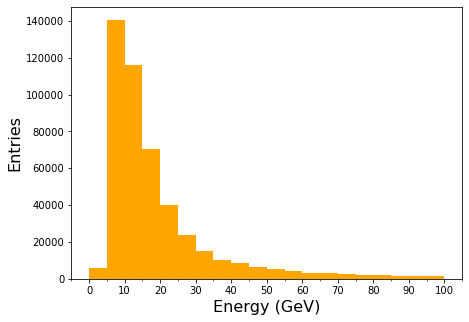

In [8]:
# Create our figure and axes
fig, ax = plt.subplots(figsize=(7, 5))

# Create a histogram
(n,bins,patches) = ax.hist(E, bins=20, range=(0,100), density=False, color = "orange")

# Set the location of the major and minor tick marks on the x-axis
ax.xaxis.set_major_locator(MultipleLocator(10))
ax.xaxis.set_minor_locator(MultipleLocator(5))

# Label our axes
ax.set_xlabel("Energy (GeV)"      , fontsize=16)
ax.set_ylabel("Entries"           , fontsize=16)

We can see that of these thousands of muon events, they most frequently have energy between 5 and 10 GeV.

## Exercise

We currently have energy and momentum information for thousands of muons reconstructed by CMS. These are the quantites directly measured by the CMS detector (see https://cms.cern/book/export/html/1618).

### Task 1

Calculate the magnitude of the momentum for all muons, followed by the mass. We are using numpy, so we can perform these calculations on the entire array (each row of the array corresponds to a different reconstructed muon):

In [9]:
from math import sqrt
p = np.sqrt(px**2+py**2+pz**2)
print("p =",p)

m2 = E**2 - p**2 # due to experimental resolution, this expression will sometimes result in a value of m2 which is less than zero

#remove negative values
mask = m2 > 0
m2 = m2[mask]

m = np.sqrt(m2)  # now it is safe to calculate the sqrt
print("m =",m)

p = [ 9.69815624  6.20294468 19.28889154 ... 18.46036946 38.86684001
 21.72607035]
m = [0.10549456 0.10598162 0.10908606 ... 0.11047144 0.11151897 0.09989474]


### Task 2

Make a histogram of the muon mass with reasonable binning and axis range:

Text(0, 0.5, 'Entries')

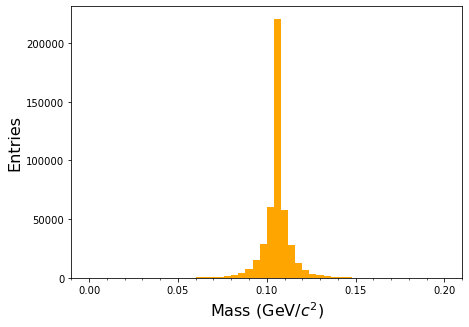

In [17]:
# Create our figure and axes
fig, ax = plt.subplots(figsize=(7, 5))

# Create a histogram
(n,bins,patches) = ax.hist(m, bins=50, range=(0,.2), density=False, color = "orange")

# Set the location of the major and minor tick marks on the x-axis
ax.xaxis.set_major_locator(MultipleLocator(.05))
ax.xaxis.set_minor_locator(MultipleLocator(.01))

# Label our axes
ax.set_xlabel("Mass (GeV/$c^2$)"  , fontsize=16)
ax.set_ylabel("Entries"           , fontsize=16)

### Task 3

Remake the mass histogram, only showing the region 0.1049 GeV/$c^2$ to 0.1065 GeV/$c^2$.

Text(0, 0.5, 'Entries')

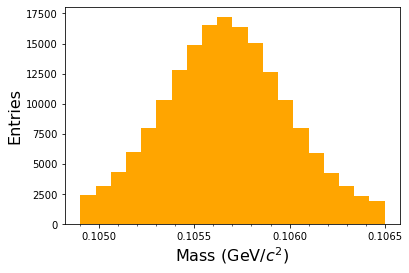

In [11]:
# Create our figure and axes
fig, ax = plt.subplots()

# Create a histogram
(n,bins,patches) = ax.hist(m, bins=20, range=(0.1049,.1065), density=False, color = "orange")

# Set the location of the major and minor tick marks on the x-axis
ax.xaxis.set_major_locator(MultipleLocator(.0005))
ax.xaxis.set_minor_locator(MultipleLocator(.0001))

# Label our axes
ax.set_xlabel("Mass (GeV/$c^2$)"  , fontsize=16)
ax.set_ylabel("Entries"           , fontsize=16)

### Task 4

Perform a fit on this histogram and overlay the fit result on the histogram. The functional form expected for the mass distribution is the <a href="https://en.wikipedia.org/wiki/Relativistic_Breit%E2%80%93Wigner_distribution">relativistic Breit-Wigner</a> function.

For reference, here is an example fit using an exponential function:

```python

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Create some fake data with np.random.exponential
Npoints = 4000
scale    = 7      # f(x)=(1/scale)e^(-x/scale)
s = 7*np.random.exponential(scale, Npoints) - 1

# Normally we do this to plot:
# plt.hist(s, bins=100, normed=True, histtype='step',color='blue')

# Instead we can do the following such that we access the tuple
#      returned by plt.hist returns a tuple
#      which contains arrays of the information that is being plotted:
#      ( http://matplotlib.org/api/pyplot_api.html?highlight=hist#matplotlib.pyplot.hist
#    n = array containing the number of entries in each bin )
#    bins = array containing the bin edges (so the length is nbins +1)

(n,bins,patches) = plt.hist(s, bins=50,  range=(0,100), density=False, histtype='step',color='blue')

# to fit we an array of bin centers:
bin_centers = 0.5*(bins[1:] + bins[:-1])

# define the function to fit
def f(t, No, tau_mu, B):
    return No*np.exp(-t/tau_mu) + B

# Guess the parameters of the fit (to give the algorithm a place to start)
guess_No = 1
guess_tau_mu = 1
guess_B = 1

# scipy.optimize.curve_fit
# https://docs.scipy.org/doc/scipy-0.19.1/reference/generated/scipy.optimize.curve_fit.html
# curve_fit(f, xdata, ydata, p0=None, sigma=None, absolute_sigma=False, check_finite=True, bounds=(-inf, inf), method=None, jac=None, **kwargs)[source]¶
# p0 is the initial guess for the function parameters
popt, pcov = curve_fit(f, bin_centers, n, p0 = [guess_No, guess_tau_mu, guess_B])

# curve_fit returns popt which is an array of the fit parameters
fit_result_No     = popt[0]
fit_result_tau_mu = popt[1]
fit_result_B      = popt[2]

# Draw the fit function with parameters returned by the fit
plt.plot(bin_centers, f(bin_centers, fit_result_No, fit_result_tau_mu, fit_result_B  ), 'r')
plt.show()
```

Here is the functional form for the Breit-Wigner:

In [12]:
# define the function used in the fit. In this case we use the relativistic Breit-Wigner function from above
def func_Breit_Wigner(x, particle_mass, width, K):
    return K / ((x**2 - particle_mass**2)**2 + (particle_mass*width)**2)


Before performing the fit, we typically provide the fitter ballpark estimates for the fit parameters (to facilitate convergence). Look at your plot above and provide a reasonable guess for the muon mass and width:

In [13]:
guess_particle_mass = .106 # the x-value of the mass peak
guess_width = .0007 # width of the peak halfway up; a.k.a. "full width at half max" or FWHM
guess_K = 9.4e-05  # a constant that affects the height of the curve, you'll need to tinker with this some

With the example above as a guide, fit the muon mass distribution with the Breit-Wigner function defined above.

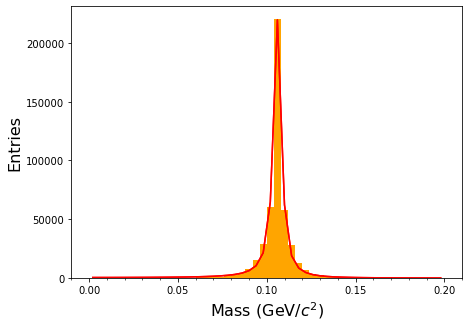

In [21]:
from scipy.optimize import curve_fit

# to fit we need an array of bin centers:
bin_centers = 0.5*(bins[1:] + bins[:-1])

# scipy.optimize.curve_fit
# https://docs.scipy.org/doc/scipy-0.19.1/reference/generated/scipy.optimize.curve_fit.html
# curve_fit(f, xdata, ydata, p0=None, sigma=None, absolute_sigma=False, check_finite=True, bounds=(-inf, inf), method=None, jac=None, **kwargs)[source]¶
# p0 is the initial guess for the function parameters
popt, pcov = curve_fit(func_Breit_Wigner, bin_centers, n, p0 = [guess_particle_mass, guess_width, guess_K])

# curve_fit returns popt which is an array of the fit parameters
fit_result_particle_mass = popt[0]
fit_result_width         = popt[1]
fit_result_K             = popt[2]

# Draw the fit function with parameters returned by the fit
ax.plot(bin_centers, func_Breit_Wigner(bin_centers, fit_result_particle_mass, fit_result_width, fit_result_K  ), 'r')

fig

The width extracted from the fit is in units of GeV/$c^2$.  To convert this value to units of GeV, multiple by $c^2$:

In [19]:
width = np.fabs(fit_result_width)/3e8**2

According to the results of the fit, what is the mass and lifetime of the muon?  Be sure to include units.

In [20]:
hbar = 6.582e-25      # in GeV*s

print("mass =", fit_result_particle_mass, "GeV")
print("lifetime =", np.format_float_scientific(hbar/(2*width),6), "seconds")

mass = 0.10602168600244037 GeV
lifetime = 5.813932e-06 seconds


Great job! By fitting the data you made a measurement of the mass and lifetime of the muon!

How do your values compare the actual values?  If there is a discrepancy, what do you think might be the cause?

How does the fit range affect the result?